In [1]:
import random
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy
from fitter import Fitter, get_common_distributions, get_distributions
from math import pi, exp

In [2]:
db= pd.read_csv(r'../dane/moves.csv')

c:\users\piotr\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
db.loc[83:93,[column for column in db.columns if column not in ["WhiteRatingDiff",'Unnamed: 0']]]

,score,delta_time,WhiteElo,BlackElo,TimeControl,color,move,Result
83,0,8.0,1888.0,1796.0,300+0,b,20.0,0-1
84,mistake,22.0,1888.0,1796.0,300+0,w,21.0,0-1
85,0,2.0,1888.0,1796.0,300+0,b,21.0,0-1
86,0,0.0,1888.0,1796.0,300+0,w,22.0,0-1
87,0,13.0,1888.0,1796.0,300+0,b,22.0,0-1
88,0,13.0,1888.0,1796.0,300+0,w,23.0,0-1
89,0,17.0,1888.0,1796.0,300+0,b,23.0,0-1
90,mistake,7.0,1888.0,1796.0,300+0,w,24.0,0-1
91,0,7.0,1888.0,1796.0,300+0,b,24.0,0-1
92,blunder,7.0,1888.0,1796.0,300+0,w,25.0,0-1


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [45]:
def histogram(x: list, xlabel='',ylabel='',title='',xlim=(-.5,61),ylim=None,show=False, **kwargs):
    # the histogram of the data
    n, bins, patches = plt.hist(x, density = True,bins= int(max(x))+1,**kwargs)
    plt.xlabel(xlabel)
    plt.ylabel=(ylabel)
    plt.title(title)
#     plt.text(50, .035, r'$\mu = 50,\
# \ \sigma = 13$')
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    if xlim:
        plt.xlim(xlim[0],xlim[1])
    plt.grid(True)
    if show:
        plt.show()
    return

89360

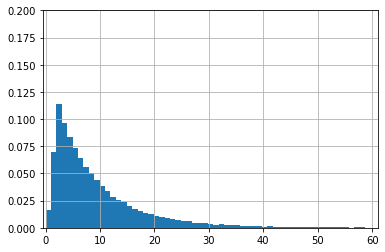

In [4]:
blunder_300 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_300['delta_time'],ylim=(0,0.2))
len(blunder_300)

1230569

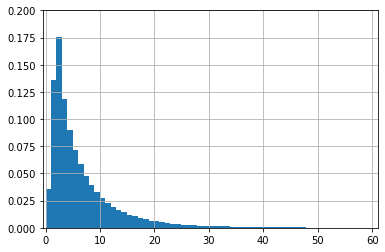

In [5]:
all_300 = db[(db['TimeControl'] == '300+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(all_300['delta_time'],ylim=(0,0.2))
len(all_300)

In [6]:
# blunder_60 = db[(db['score'] == 'mistake' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# # c = blunder_60['delta_time'].hist(bins = 60, density = True)
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
# len(blunder_60)

In [7]:
# blunder_60 = db[(db['score'] == 'dubious move' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
# len(blunder_60)

prawdopodobienstwo popełenienia błedu w zależności od ruchu dla 300+0

In [8]:

m = db[db['TimeControl']=='300+0'][['score','move','Result']].groupby(['move','score']).count().reset_index()
m

,move,score,Result
0,1.0,0,44169
1,1.0,dubious move,579
2,1.0,mistake,50
3,2.0,0,39693
4,2.0,blunder,43
...,...,...,...
380,107.0,0,2
381,108.0,0,2
382,109.0,0,2
383,110.0,0,2


In [9]:
m2 = pd.merge(m,m.groupby('move').sum().reset_index(),how='left', on='move')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [10]:
m2[m2['score']=='blunder'][['score','move','prob']]

,score,move,prob
4,blunder,2.0,0.000960
8,blunder,3.0,0.004487
12,blunder,4.0,0.011746
16,blunder,5.0,0.019017
20,blunder,6.0,0.026870
...,...,...,...
358,blunder,95.0,0.086957
361,blunder,96.0,0.055556
366,blunder,98.0,0.066667
369,blunder,99.0,0.142857


<AxesSubplot:xlabel='move'>

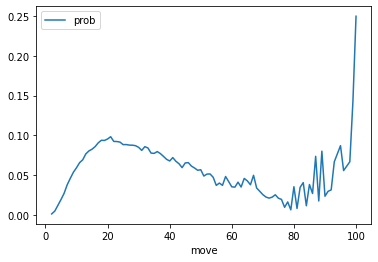

In [11]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='prob')

<AxesSubplot:xlabel='move'>

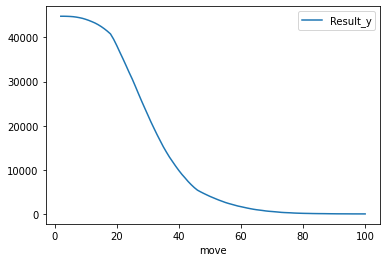

In [12]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='Result_y')


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [128]:
m = db[(db['TimeControl']=='300+0') & (db['delta_time']>=0)& (db['delta_time']<=60)][['score','delta_time','Result']].groupby(['delta_time','score']).count().reset_index()
m

,delta_time,score,Result
0,0.0,0,89319
1,0.0,blunder,1501
2,0.0,dubious move,5497
3,0.0,mistake,2394
4,1.0,0,170011
...,...,...,...
239,59.0,mistake,35
240,60.0,0,53
241,60.0,blunder,19
242,60.0,dubious move,14


In [119]:
m2 = pd.merge(m,m.groupby('delta_time').sum().reset_index(),how='left', on='delta_time')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [120]:
m2[m2['score']=='blunder'][['score','delta_time','prob']]

,score,delta_time,prob
1,blunder,0.0,0.015206
5,blunder,1.0,0.030148
9,blunder,2.0,0.041204
13,blunder,3.0,0.053792
17,blunder,4.0,0.062930
...,...,...,...
225,blunder,56.0,0.125714
229,blunder,57.0,0.179310
233,blunder,58.0,0.230769
237,blunder,59.0,0.161538


<AxesSubplot:xlabel='delta_time'>

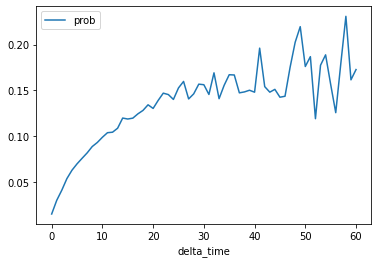

In [121]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='prob')

<AxesSubplot:xlabel='delta_time'>

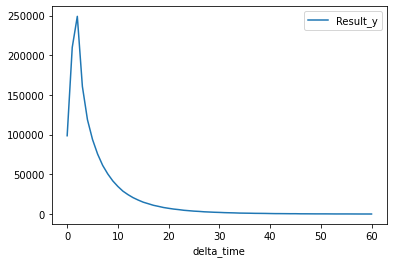

In [127]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='Result_y')

In [18]:
db.groupby('TimeControl').size().reset_index().sort_values(by=0,ascending=False).head(10)

,TimeControl,0
277,600+0,1813841
170,300+0,1409904
265,60+0,1251388
372,900+15,1104458
96,180+0,1057292
180,300+3,941262
101,180+2,745517
44,120+1,448990
364,900+0,69213
73,15+0,46989


In [20]:
# fitting dist to data try
# blunder_60['delta_time'].var()
def lognorm_params(data):
    ex = data.mean()
    var = data.var()

    mu = np.log(ex**2/np.sqrt(var+ex**2))
    sigma = np.log(var/ex**2 +1)
    return mu, sigma
# def gamma_params(data)

In [21]:
print(lognorm_params(blunder_300['delta_time']))


(1.85235681832222, 0.73271755729046)


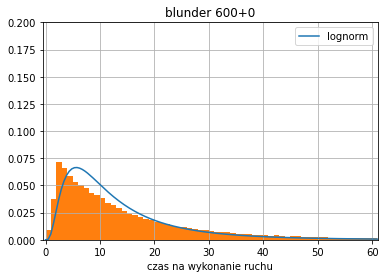

In [46]:
blunder_600 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '600+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_600['delta_time'],show=True,ylim=(0,0.2))
# len(blunder_600)
y = blunder_600['delta_time']
# size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title='blunder 600+0')
plt.legend(loc='upper right')
plt.show()

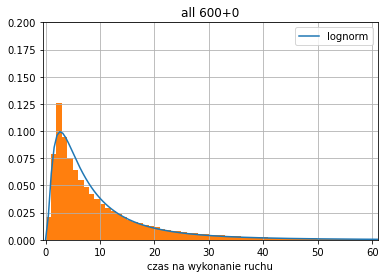

In [47]:
all_600 = db[( db['TimeControl'] == '600+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
# histogram(blunder_600['delta_time'],show=True,ylim=(0,0.2))
# len(blunder_600)
y = all_600['delta_time']
# size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title='all 600+0')
plt.legend(loc='upper right')
plt.show()

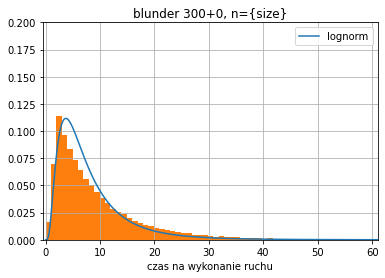

In [48]:
y = blunder_300['delta_time']

# size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title='blunder 300+0, n={size}')
plt.legend(loc='upper right')
plt.show()

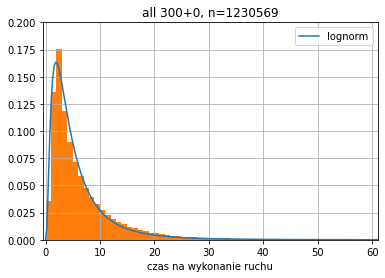

In [49]:

y = all_300['delta_time']

size = len(y)
x = np.linspace(min(y)+0.0001,max(y),1000)


ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.plot(x,X, label='lognorm')
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title=f'all 300+0, n={size}')
plt.legend(loc='upper right')
plt.show()


(0.8962023949201492, -1.1148126429431623e-28, 5.831679748549323)


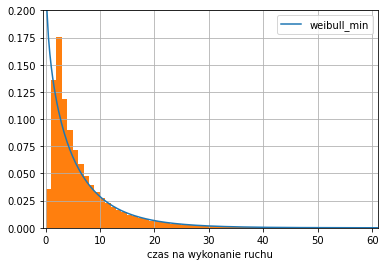

9.195512533572067

In [50]:
size = len(all_300['delta_time'])
x = np.linspace(min(all_300['delta_time'])+0.0001,max(all_300['delta_time']),1000)
y = all_300['delta_time']

dist_names = ['weibull_min']

###
ex,var = lognorm_params(y)
###
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    print(params)
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
    plt.plot(x,pdf_fitted, label=dist_name)
histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo')
plt.legend(loc='upper right')
plt.show()
(blunder_300['delta_time']).mean()

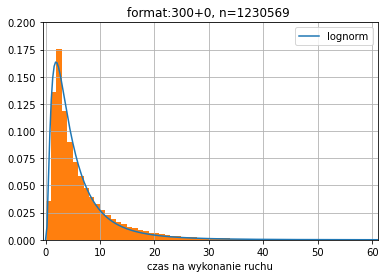

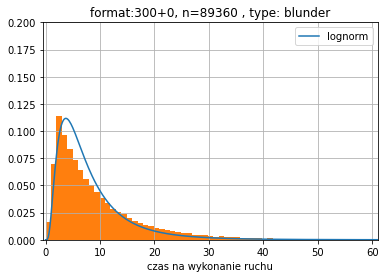

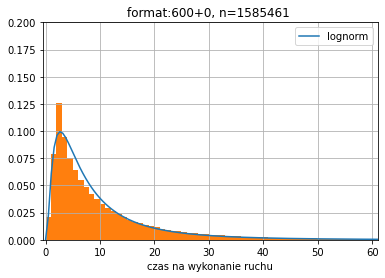

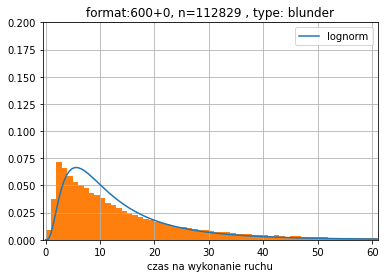

In [37]:
for item in [all_300,blunder_300,all_600,blunder_600]:

    y = item['delta_time']

    size = len(y)
    x = np.linspace(min(y)+0.0001,max(y),1000)


    ex,var = lognorm_params(y)

    X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

    plt.plot(x,X, label='lognorm')
    histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title=f'format:{item.iloc[0,6]}, n={size} {", type: blunder" if item.iloc[0,1]=="blunder" else ""}')
    plt.legend(loc='upper right')
    plt.show()

porównanie
zależność:
x -  numer ruchu, y średni czas na wykonanie - dla wszystkich ruchów i tylko dla ruchów blunder

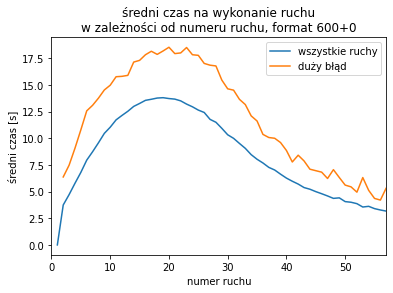

In [113]:
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()
p1 = a[a['TimeControl'] == '600+0'][['move','delta_time']]
b = db.groupby(['TimeControl','score','move']).agg({'delta_time': np.mean}).reset_index()
p2 = b[(b['TimeControl'] == '600+0') & (b['score'] == 'blunder')][['move','delta_time']]

plt.figure()
plt.plot(p1['move'],p1['delta_time'],label='wszystkie ruchy')
plt.plot(p2['move'],p2['delta_time'],label='duży błąd')
plt.legend()
plt.xlim(0,57)
plt.xlabel('numer ruchu')
plt.ylabel('średni czas [s]')
plt.title('średni czas na wykonanie ruchu\nw zależności od numeru ruchu, format 600+0')
plt.savefig('graph.svg')
plt.show()

tyle ruchów na gre jest

In [90]:
ruchy =  db[db['TimeControl'].isin(['300+0','600+0'])][['move','score']].groupby(['move']).count().reset_index()
ruchy['X'] = ruchy['score']*(-1)**(np.arange(len(ruchy)))


In [87]:
r2 = ruchy['score'].diff(-1)
r = ruchy['score'].diff(-1).reset_index()
# kwantyl rzędu 0.95
r[r['score'].cumsum()<0.95*101833]

,index,score
0,0,0.0
1,1,8.0
2,2,41.0
3,3,95.0
4,4,121.0
5,5,212.0
6,6,298.0
7,7,407.0
8,8,509.0
9,9,583.0


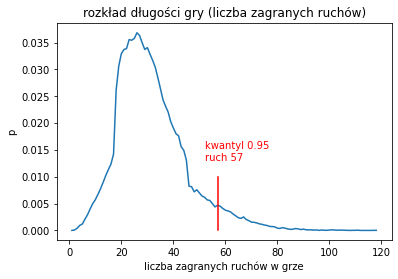

In [109]:
r2/r2.sum()
plt.figure()
plt.plot(np.arange(1,120),r2/r2.sum())

plt.plot([57,57],[0,0.01], color='red')

plt.text(52, 0.013,'kwantyl 0.95\nruch 57',color='red')



plt.xlabel('liczba zagranych ruchów w grze')
plt.ylabel('p')
plt.title('rozkład długości gry (liczba zagranych ruchów)')
plt.savefig('graph.svg')
plt.show()

In [94]:
np.arange(1,120)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119])